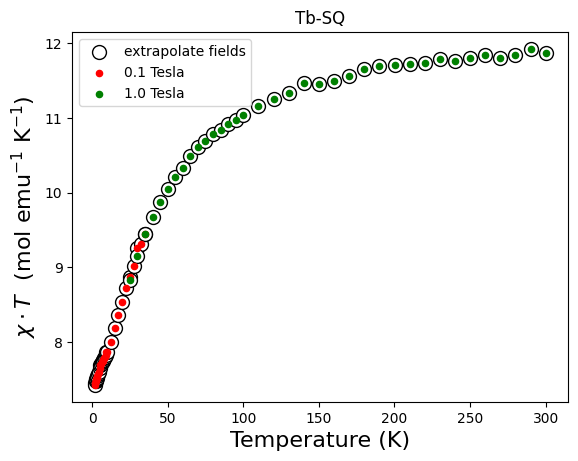

In [1]:
import os
import copy
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.interpolate import interp1d


dpath='./test_data'  # data path

# --- Load data (skip header) ---
file='TbSQ_chiT_Lorenzo.dat' # susceptibility data
file=os.path.join(
    dpath,
    file
)
rawdat = np.genfromtxt(
    file, 
    # comments='#', 
    delimiter=None, 
    dtype='float', 
    missing_values='--', 
    filling_values=np.nan,
    skip_header=1, 
) 

# rawdat columns:
# col 0 = Temperature (K), T
# col 1 = \chi * T @ 0.1 Tesla
# col 2 = \chi * T @ 1.0 Tesla

# --- Remove rows where there is no temperature (placeholder row) ---
valid = ~np.isnan(rawdat[:, 0])
rawdat = rawdat[valid]

# --- Split datasets ---
T_1 = rawdat[:, 0]
chiT_1 = rawdat[:, 1]

T_2 = rawdat[:, 0]       
chiT_2 = rawdat[:, 2]


# --- Merge rule ---
# For every temperature:
# If chiT_1 exists → use it
# Else if chiT_2 exists → use chiT_2
# Else NaN

chiT_merged = np.where(~np.isnan(chiT_1), chiT_1, chiT_2)

# --- Final clean arrays ---
temp = T_1
chiT = chiT_merged

chiT_merged
temp, chiT
temp.shape, chiT.shape

# --- Plot merged and raw chiT ---
plt.scatter(
    temp,
    chiT,
    s=100,
    color='black',
    facecolor='white',
    label='extrapolate fields'
)
plt.scatter(
    rawdat[:,0],
    rawdat[:,1],
    s=20,
    color='red',
    label='0.1 Tesla'
)
plt.scatter(
    rawdat[:,0],
    rawdat[:,2],
    s=20,
    color='green',
    label='1.0 Tesla'
)
plt.title('Tb-SQ')
plt.ylabel(r'$\chi \cdot T~$ (mol emu$^{-1}$ K${^{-1}}$)', fontsize=16)
plt.xlabel('Temperature (K)', fontsize=16)
plt.legend()
plt.show()


filename: TbSQ_myOutputGPS_LF500G_0_v1.dat        
extrapolated data save in filename: TbSQ_chiT_muSRrelaxations_LF500G.dat    
filename: TbSQ_myOutputGPS_LF1500G_0_v1.dat       
extrapolated data save in filename: TbSQ_chiT_muSRrelaxations_LF1500G.dat   
filename: TbSQ_myOutputGPS_LF3000G_0_v1.dat       
extrapolated data save in filename: TbSQ_chiT_muSRrelaxations_LF3000G.dat   


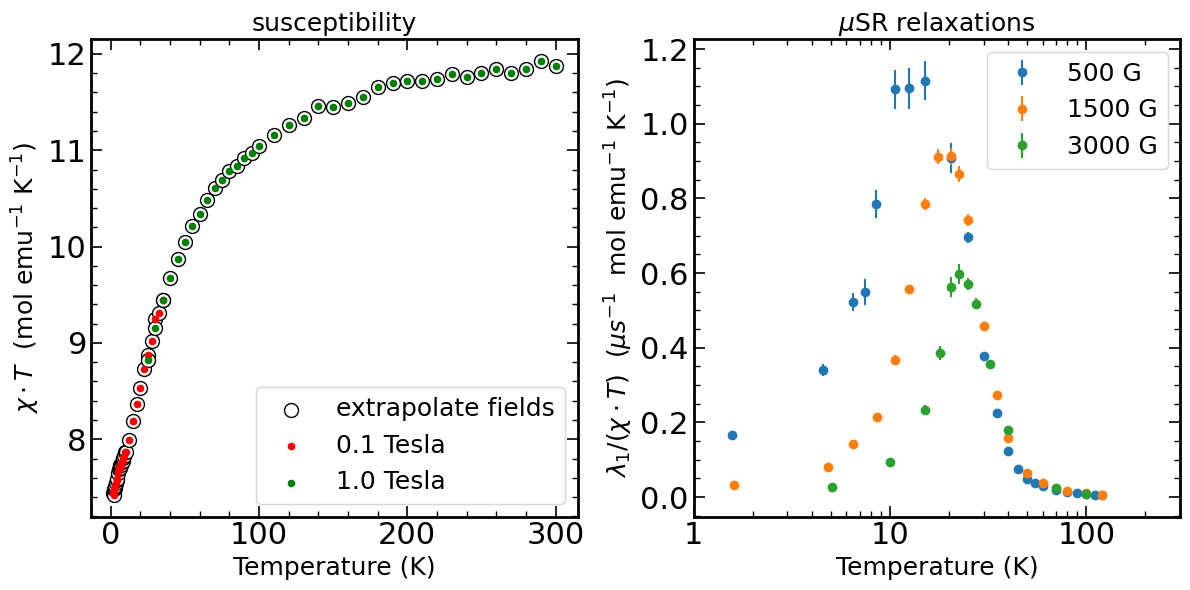

['dataT0',
 'dataT0Err',
 'dataT1',
 'dataT1Err',
 'dataB',
 'Alpha',
 'AlphaPosErr',
 'AlphaNegErr',
 'Asy_1',
 'Asy_1PosErr',
 'Asy_1NegErr',
 'Bet_1',
 'Bet_1PosErr',
 'Bet_1NegErr',
 'LFextG_1',
 'LFextG_1PosErr',
 'LFextG_1NegErr',
 'Asy_2',
 'Asy_2PosErr',
 'Asy_2NegErr',
 'Asy_0',
 'Asy_0PosErr',
 'Asy_0NegErr',
 'Lam_1_',
 'Lam_1_PosErr',
 'Lam_1_NegErr',
 'Delta_1_',
 'Delta_1_PosErr',
 'Delta_1_NegErr',
 'Lam_2_',
 'Lam_2_PosErr',
 'Lam_2_NegErr',
 'CHISQ',
 'NDF',
 'CHISQred',
 'RUN']

In [2]:
import os
import copy
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


dpath='./test_data'  # data path

# --- Load data (skip header) ---
file='TbSQ_chiT_Lorenzo.dat' # susceptibility data
file=os.path.join(
    dpath,
    file
)
rawdat = np.genfromtxt(
    file, 
    # comments='#', 
    delimiter=None, 
    dtype='float', 
    missing_values='--', 
    filling_values=np.nan,
    skip_header=1, 
) 

# rawdat columns:
# col 0 = Temperature (K), T
# col 1 = \chi * T @ 0.1 Tesla
# col 2 = \chi * T @ 1.0 Tesla

# --- Remove rows where there is no temperature (placeholder row) ---
valid = ~np.isnan(rawdat[:, 0])
rawdat = rawdat[valid]

# --- Split datasets ---
T_1 = rawdat[:, 0]
chiT_1 = rawdat[:, 1]

T_2 = rawdat[:, 0]       
chiT_2 = rawdat[:, 2]


# --- Merge rule ---
# For every temperature:
# If chiT_1 exists → use it
# Else if chiT_2 exists → use chiT_2
# Else NaN

chiT_merged = np.where(~np.isnan(chiT_1), chiT_1, chiT_2)

# --- Final clean arrays ---
temp = T_1
chiT = chiT_merged

chiT_merged
temp, chiT
temp.shape, chiT.shape

# --- create subplots panel ----
fontsize=18
fig = plt.figure(
    figsize=(12, 6),
    layout='tight' # 'constrained', 'compressed', 'tight', 'none', `.LayoutEngine`, None; default: None
)
axes = fig.subplots(
    nrows=1,
    ncols=2,
    sharex=False,
    sharey=False,
)
for ax in axes.ravel():
    # Major ticks
    ax.tick_params(
        axis='both',
        which='major',
        direction='in',
        length=8,       # major tick length
        width=1.2,      # major tick width
        labelsize=fontsize+4,
        labelcolor='k'
    )

    # Minor ticks
    ax.tick_params(
        axis='both',
        which='minor',
        direction='in',
        length=4,       # minor tick length
        width=1.0       # minor tick width
    )
    ax.tick_params(
        axis='both', which='both',
        top=True, bottom=True, 
        left=True, right=True
        )
    for spine in ax.spines.values():
        spine.set_linewidth(2)   # choose thickness you want

    ax.minorticks_on()

# --- Plot merged and raw chiT ---
axes[0].scatter(
    temp,
    chiT,
    s=100,
    color='black',
    facecolor='white',
    label='extrapolate fields'
)
axes[0].scatter(
    rawdat[:,0],
    rawdat[:,1],
    s=20,
    color='red',
    label='0.1 Tesla'
)
axes[0].scatter(
    rawdat[:,0],
    rawdat[:,2],
    s=20,
    color='green',
    label='1.0 Tesla'
)

# axes[0].set_xscale('log')
# axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda val, _: f"{int(val)}"))
# axes[0].set_xlim([1, 300])
axes[0].set_title('Tb-SQ', fontsize=fontsize)
axes[0].set_title('susceptibility', fontsize=fontsize)
axes[0].set_ylabel(r'$\chi \cdot T~$ (mol emu$^{-1}$ K${^{-1}}$)', fontsize=fontsize)
axes[0].set_xlabel('Temperature (K)', fontsize=fontsize)
axes[0].legend()



def interpolate_chi(xdat, ydat, x_interpolate=None):
    """ 
    Function defined from the interpolation data 
    """ 
    import scipy as sp
    f = sp.interpolate.interp1d(
        xdat, 
        ydat, 
        kind='cubic', 
        bounds_error=False, 
        fill_value='extrapolate'
        )
    if x_interpolate:
        return f(x_interpolate)
    return f(xdat) 

# --- Process LF-muSR (data) relaxation files ---
field_lst = [500, 1500, 3000]
for field in field_lst:
    file=f'TbSQ_myOutputGPS_LF{field}G_0_v1.dat'
    print(f'filename: {file:<40}')
    file = os.path.join(
        dpath,
        file
    )    
    # Read header line using pandas to get each column names
    # column_lst = list(pd.read_csv(file).keys())[0].split()
    header_lst = list(pd.read_csv(file).keys())
    column_lst = header_lst[0].split()
    # print(column_lst)
    # Load data (skip header row)
    rawdat = np.loadtxt(
        file, 
        delimiter=None,
        # comments='#',
        skiprows=1
    )

    # read dynamic relaxations data λ(T) by extracting columns by positions
    xdat=rawdat[:,column_lst.index('dataT1')]
    ydat=rawdat[:,column_lst.index('Lam_1_')]
    yerr=rawdat[:,column_lst.index('Lam_1_PosErr')]

    # Interpolate λ(T)
    numpoints = len(xdat)
    xfit = np.linspace(min(xdat), max(xdat), num=numpoints)
    interpol = sp.interpolate.interp1d(xdat, ydat, kind='cubic', fill_value='extrapolate')
    # yfit = interpol(xfit)  # smooth λ(T): wrong
    yfit = interpol(xdat)  # smooth λ(T): correct
    yfit = interpolate_chi(xdat, ydat, x_interpolate=None) # smooth λ(T): correct

    # Interpolate χT onto same temperature points
    # ychiT = np.interp(xfit, temp, chiT) # wrong
    ychiT = np.interp(xdat, temp, chiT) # correct

    # Compute λ/χT and error normalization
    # xdat_norm = xfit    # (wrong): not really norm xdat but just to follow name convention
    xdat_norm = xdat    # (correct): not really norm xdat but just to follow name convention
    ydat_norm = yfit / ychiT
    yerr_norm = yerr / ychiT

    # plot extrapolated data
    axes[1].errorbar(
        xdat_norm,
        ydat_norm,
        yerr=yerr_norm,
        fmt='o',
        label=f'{field} G'
    )

    # save extrapolated data into file
    filename=f'TbSQ_chiT_muSRrelaxations_LF{field}G.dat'
    print(f'extrapolated data save in filename: {filename:<40}')
    filename = os.path.join(
        dpath,
        filename
    )  
    np.savetxt(
        filename,
        np.column_stack([xdat_norm, ydat_norm, yerr_norm]),
        fmt='%.8e',
        delimiter=',',
        header='temp, lambda, lambda_err',   # <-- your header
        comments=''  # optional: prevent '#' at the start of the header
       )

axes[1].set_xscale('log')
axes[1].set_xlim([1, 300])
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda val, _: f"{int(val)}"))
axes[1].set_title(r'$\mu$SR relaxations', fontsize=fontsize)
axes[1].set_ylabel(r'$\lambda_{1}/(\chi_{}\cdot T)~$ ($\mu s^{-1}~$ mol emu$^{-1}$ K$^{-1}$)', fontsize=fontsize)
axes[1].set_xlabel('Temperature (K)', fontsize=fontsize)
axes[1].legend()

for ax in axes.ravel():
    ax.legend(
        frameon=True,
        prop={'size': fontsize}
        )
plt.show()


column_lst

In [3]:
xdat_lst = []
ydat_lst = []
yerr_lst = []
# --- Process LF-muSR (data) relaxation files ---
field_lst = [500, 1500, 3000]
for field in field_lst:
    file=f'TbSQ_chiT_muSRrelaxations_LF{field}G.dat'
    print(f'filename: {file:<40}')
    file = os.path.join(
        dpath,
        file
    )  
    # Read header line using pandas to get each column names
    # column_lst = list(pd.read_csv(file).keys())[0].split()
    header_lst = list(pd.read_csv(file).keys())
    column_lst = header_lst[0].split()
    # print(column_lst)
    # Load data (skip header row)
    rawdat = np.loadtxt(
        file, 
        delimiter=',',
        # comments='#',
        skiprows=1
    )

    # read dynamic relaxations data λ(T) by extracting columns by positions
    # xdat=rawdat[:,column_lst.index('temp')]
    # ydat=rawdat[:,column_lst.index('lambda')]
    # yerr=rawdat[:,column_lst.index('lambda_err')]

    # read dynamic relaxations data λ(T) by extracting columns by positions
    xdat=rawdat[:,0]
    ydat=rawdat[:,1]
    yerr=rawdat[:,2]

    xdat_lst.append(xdat.tolist())
    ydat_lst.append(ydat.tolist())
    yerr_lst.append(yerr.tolist())

xdat_lst, ydat_lst, yerr_lst

filename: TbSQ_chiT_muSRrelaxations_LF500G.dat    
filename: TbSQ_chiT_muSRrelaxations_LF1500G.dat   
filename: TbSQ_chiT_muSRrelaxations_LF3000G.dat   


([[120.45,
   110.099,
   100.025,
   90.1314,
   80.0983,
   70.0825,
   60.0549,
   55.0358,
   50.0365,
   45.0162,
   40.0001,
   35.0,
   30.1052,
   25.0923,
   20.4802,
   15.0374,
   12.5373,
   10.5567,
   8.51366,
   7.41689,
   6.5161,
   4.55674,
   1.56877],
  [120.015,
   100.173,
   80.1492,
   60.0592,
   50.0364,
   40.0013,
   35.0,
   30.1041,
   25.1006,
   22.5814,
   20.444,
   17.5465,
   15.0423,
   12.5383,
   10.561,
   8.55477,
   6.51474,
   4.84392,
   1.60622],
  [100.107,
   70.1756,
   40.0105,
   32.1281,
   27.5689,
   25.0965,
   22.5789,
   20.4637,
   17.8752,
   15.0525,
   10.033,
   5.06023]],
 [[0.00604682878,
   0.00658840461,
   0.00833345945,
   0.0105649731,
   0.0138673961,
   0.0191181736,
   0.0289601112,
   0.0376097319,
   0.0495344415,
   0.0763933702,
   0.122123354,
   0.224657969,
   0.377525164,
   0.696589044,
   0.907697976,
   1.11560328,
   1.09532969,
   1.09181465,
   0.784399508,
   0.549145462,
   0.522638009,
   0.34075643

In [4]:
# all_x = np.unique(np.concatenate(xdat_lst))
# N = len(xdat_lst)

# y_merged = np.full((len(all_x), N), np.nan)

# N
# y_merged.shape

# type(xdat_lst)

# arr = np.asarray(xdat_lst)
# np.array(xdat_lst)

# isinstance(xdat_lst, list)
# arr.ndim

# np.array(xdat_lst)

isinstance(xdat_lst, list)

len(xdat_lst)

[len(dat) for dat in xdat_lst]

[23, 19, 12]

In [5]:
def merge_xyerr_data_pandas(xdat_lst, ydat_lst, yerr_lst=None):
    """
    Merges multiple (x, y, yerr) datasets into a single DataFrame with a shared x-axis.
    Missing values are filled with np.nan. If yerr_lst is None, error columns are omitted.

    Args:
        xdat_lst (list of np.ndarray): List of x arrays.
        ydat_lst (list of np.ndarray): List of y arrays.
        yerr_lst (list of np.ndarray or None): List of error arrays or None.

    Returns:
        pandas.DataFrame: Merged table with columns: 'x', 'y0', 'yerr0', 'y1', 'yerr1', ...
    """
    import pandas as pd
    dfs = []
    for i, (x, y) in enumerate(zip(xdat_lst, ydat_lst)):
        data = {'x': x, f'y{i}': y}
        if yerr_lst is not None:
            data[f'yerr{i}'] = yerr_lst[i]
        dfs.append(pd.DataFrame(data))

    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = pd.merge(merged_df, df, on='x', how='outer')

    return merged_df.sort_values(by='x').reset_index(drop=True)

def merge_xyerr_data_numpy(xdat_lst, ydat_lst, yerr_lst=None):
    """
    Merges multiple (x, y, yerr) datasets into a unified NumPy array with shared x-axis.
    Missing values are filled with np.nan. If yerr_lst is None, error array is omitted.

    Args:
        xdat_lst (list of np.ndarray): List of x arrays.
        ydat_lst (list of np.ndarray): List of y arrays.
        yerr_lst (list of np.ndarray or None): List of error arrays or None.

    Returns:
        tuple: (x_merged, y_merged[, yerr_merged])
    """
    all_x = np.unique(np.concatenate(xdat_lst))
    N = len(xdat_lst)

    y_merged = np.full((len(all_x), N), np.nan)
    yerr_merged = None if yerr_lst is None else np.full((len(all_x), N), np.nan)

    for i in range(N):
        x = xdat_lst[i]
        y = ydat_lst[i]
        for xi, yi in zip(x, y):
            idx = np.where(all_x == xi)[0]
            if idx.size > 0:
                y_merged[idx[0], i] = yi
        if yerr_lst is not None:
            for xi, ei in zip(x, yerr_lst[i]):
                idx = np.where(all_x == xi)[0]
                if idx.size > 0:
                    yerr_merged[idx[0], i] = ei

    return (all_x, y_merged, yerr_merged) if yerr_lst is not None else (all_x, y_merged)

def merge_xyerr_data_numpy(xdat_lst, ydat_lst, yerr_lst=None):
    """
    Merges multiple (x, y, yerr) datasets into a unified NumPy array with shared x-axis.
    Missing values are filled with np.nan. If yerr_lst is None, error columns are omitted.

    Args:
        xdat_lst (list of np.ndarray): List of x arrays.
        ydat_lst (list of np.ndarray): List of y arrays.
        yerr_lst (list of np.ndarray or None): List of error arrays or None.

    Returns:
        np.ndarray: 2D array with columns: x, y_1, yerr_1, y_2, yerr_2, ...
    """
    all_x = np.unique(np.concatenate(xdat_lst))
    N = len(xdat_lst)

    y_merged = np.full((len(all_x), N), np.nan)
    yerr_merged = None if yerr_lst is None else np.full((len(all_x), N), np.nan)

    for i in range(N):
        x = xdat_lst[i]
        y = ydat_lst[i]
        for xi, yi in zip(x, y):
            idx = np.where(all_x == xi)[0]
            if idx.size > 0:
                y_merged[idx[0], i] = yi
        if yerr_lst is not None:
            for xi, ei in zip(x, yerr_lst[i]):
                idx = np.where(all_x == xi)[0]
                if idx.size > 0:
                    yerr_merged[idx[0], i] = ei

    # Stack into final output: [x | y_1 | yerr_1 | y_2 | yerr_2 | ...]
    if yerr_lst is not None:
        combined = [all_x.reshape(-1, 1)]
        for i in range(N):
            combined.append(y_merged[:, i].reshape(-1, 1))
            combined.append(yerr_merged[:, i].reshape(-1, 1))
        return np.hstack(combined)
    else:
        return np.column_stack((all_x, y_merged))

In [6]:
df = merge_xyerr_data_pandas(xdat_lst, ydat_lst, yerr_lst=yerr_lst)
arr1 = df.to_numpy()

header = [
    'temp', 
    '500G_lambda', '500G_lambda_err',
    '1500G_lambda', '1500G_lambda_err',
    '3000G_lambda', '3000G_lambda_err',
    ]
filename='TbSQ_chiT_muSRrelaxations_LF500G_LF1500G_LF3000G.dat'
filename='TbSQ_chiT_muSRrelaxations_LF500G_LF1500G_LF3000G.csv'
print(f'filename: {filename:<40}')
filename = os.path.join(
    dpath,
    filename
) 
# df.to_csv(filename, index=False, header=header)
df.to_csv(filename, index=False, header=header, na_rep="nan", float_format="%.5f")

data1 = np.genfromtxt(
    filename,
    delimiter=",",
    dtype=float,
    skip_header=1,
    encoding="utf-8",
    # missing_values='--', 
    # filling_values=np.nan,
)

arr1[:,0]
df

data1
data1[:,0]

filename: TbSQ_chiT_muSRrelaxations_LF500G_LF1500G_LF3000G.csv


array([  1.56877,   1.60622,   4.55674,   4.84392,   5.06023,   6.51474,
         6.5161 ,   7.41689,   8.51366,   8.55477,  10.033  ,  10.5567 ,
        10.561  ,  12.5373 ,  12.5383 ,  15.0374 ,  15.0423 ,  15.0525 ,
        17.5465 ,  17.8752 ,  20.444  ,  20.4637 ,  20.4802 ,  22.5789 ,
        22.5814 ,  25.0923 ,  25.0965 ,  25.1006 ,  27.5689 ,  30.1041 ,
        30.1052 ,  32.1281 ,  35.     ,  40.0001 ,  40.0013 ,  40.0105 ,
        45.0162 ,  50.0364 ,  50.0365 ,  55.0358 ,  60.0549 ,  60.0592 ,
        70.0825 ,  70.1756 ,  80.0983 ,  80.1492 ,  90.1314 , 100.025  ,
       100.107  , 100.173  , 110.099  , 120.015  , 120.45   ])

In [ ]:
arr2 = merge_xyerr_data_numpy(xdat_lst, ydat_lst, yerr_lst=yerr_lst)

header = [
    'temp', 
    '500G_lambda', '500G_lambda_err',
    '1500G_lambda', '1500G_lambda_err',
    '3000G_lambda', '3000G_lambda_err',
    ]
filename='TbSQ_chiT_muSRrelaxations_LF500G_LF1500G_LF3000G.dat'
# filename='TbSQ_chiT_muSRrelaxations_LF500G_LF1500G_LF3000G.csv'
print(f'filename: {filename:<40}')
filename = os.path.join(
    dpath,
    filename
) 

np.savetxt(
    filename,
    arr2,
    delimiter=",",
    header=",".join(header),
    comments="",                  # Prevents '#' before header
    fmt="%.5f",                   # Format floats to 5 decimal places
    encoding="utf-8"
)

data2 = np.loadtxt(
    filename, 
    delimiter=',',
    # comments='#',
    skiprows=1
)

data2
data2[:,0]

filename

filename: TbSQ_chiT_muSRrelaxations_LF500G_LF1500G_LF3000G.csv


'./test_data/TbSQ_chiT_muSRrelaxations_LF500G_LF1500G_LF3000G.csv'

In [ ]:
idx=1
np.subtract(arr2[:,idx], arr1[:,idx])

arr2[:,idx]

array([0.84722027,        nan, 0.71123212,        nan,        nan,
              nan, 0.59295426, 0.57744305, 0.45639368,        nan,
              nan, 0.33560693,        nan, 0.33442933,        nan,
       0.32771751,        nan,        nan,        nan,        nan,
              nan,        nan, 0.40345191,        nan,        nan,
       0.49828203,        nan,        nan,        nan,        nan,
       0.68555595,        nan, 0.79878938, 0.88503919,        nan,
              nan, 0.9264517 ,        nan, 0.95167238, 0.96308873,
       0.97145521,        nan, 0.98106342,        nan, 0.98622831,
              nan, 0.98949064, 0.99170117,        nan,        nan,
       0.99343325,        nan, 0.99397142])

In [9]:
isinstance(data2, list)


False

In [10]:
xdat_lst2 = []
ydat_lst2 = []
yerr_lst2 = []

for i in range(3):
    file=f'Oscil{i+1}_Field.dat'
    print(f'filename: {file:<40}')
    file = os.path.join(
        dpath,
        file
    )      
    # Read header line using pandas to get each column names
    # column_lst = list(pd.read_csv(file).keys())[0].split()
    header_lst = list(pd.read_csv(file).keys())
    column_lst = header_lst[0].split()
    # print(column_lst)
    # Load data (skip header row)
    rawdat = np.loadtxt(
        file, 
        delimiter=',',
        # comments='#',
        skiprows=1
    )

    # read fields in Gauss
    conv_factor=1.0  # conversion factor Gauss to Gauss
    conv_factor=0.1  # conversion factor Gauss to milli-Tesla
    xdat=rawdat[:,0]                 # temperature in Kelvin
    ydat=rawdat[:,1] * conv_factor   
    yerr=rawdat[:,2] * conv_factor

    xdat_lst2.append(xdat.tolist())
    ydat_lst2.append(ydat.tolist())
    yerr_lst2.append(yerr.tolist())

xdat_lst2, ydat_lst2, yerr_lst2

filename: Oscil1_Field.dat                        
filename: Oscil2_Field.dat                        
filename: Oscil3_Field.dat                        


([[1.49458,
   2.20431,
   2.85934,
   3.45216,
   4.02232,
   4.59188,
   4.75646,
   4.92292,
   5.03449,
   5.14718],
  [1.49458,
   2.20431,
   2.85934,
   3.45216,
   4.02232,
   4.59188,
   4.75646,
   4.92292,
   5.03449,
   5.14718],
  [1.49458,
   2.20431,
   2.85934,
   3.45216,
   4.02232,
   4.59188,
   4.75646,
   4.92292,
   5.03449,
   5.14718]],
 [[7.033, 7.021, 6.949, 6.763, 6.445, 5.647, 5.009, 0.0, 0.0, 0.0],
  [9.1537,
   9.14,
   9.0494,
   8.793899999999999,
   8.31,
   7.152,
   6.648000000000001,
   3.48,
   0.0,
   0.0],
  [14.548, 14.740000000000002, 14.36, 14.15, 13.131, 0.0, 0.0, 0.0, 0.0, 0.0]],
 [[0.021,
   0.023000000000000003,
   0.022000000000000002,
   0.026000000000000002,
   0.033,
   0.061,
   0.084,
   0.0,
   0.0,
   0.0],
  [0.0078000000000000005,
   0.009,
   0.008400000000000001,
   0.0089,
   0.010000000000000002,
   0.032,
   0.068,
   0.32000000000000006,
   0.0,
   0.0],
  [0.094,
   0.13,
   0.12,
   0.11000000000000001,
   0.0920000000000

In [11]:
arr3 = merge_xyerr_data_numpy(xdat_lst2, ydat_lst2, yerr_lst=yerr_lst2)

arr3


header = [
    'temp', 
    'Bmu2', 'Bmu2_err',
    'Bmu1', 'Bmu1_err',
    'Bmu3', 'Bmu3_err',
    ]
filename='Na2PrO3_muSR_Bmu.dat'
# filename='Na2PrO3_muSR_Bmu.csv'
print(f'filename: {filename:<40}')
filename = os.path.join(
    dpath,
    filename
) 

np.savetxt(
    filename,
    arr3,
    delimiter=",",
    header=",".join(header),
    comments="",                  # Prevents '#' before header
    fmt="%.5f",                   # Format floats to 5 decimal places
    encoding="utf-8"
)

data3 = np.loadtxt(
    filename, 
    delimiter=',',
    # comments='#',
    skiprows=1
)

data3
data3[:,0]
"""
0: temp
1: Bmu2
2: Bmu2_err
3: Bmu1
4: Bmu1_err
5: Bmu3
6: Bmu3_err
"""

filename: Na2PrO3_muSR_Bmu.dat                    


'\n0: temp\n1: Bmu2\n2: Bmu2_err\n3: Bmu1\n4: Bmu1_err\n5: Bmu3\n6: Bmu3_err\n'